In [272]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [273]:
testperson = 15

In [274]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Emborg_15.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.281180,1,1,-22.789991,30.862652,742.616699,45.055584,32.888927,741.678589,0.541791,...,2.302963,2.401810,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
1,0.292511,1,1,-22.777300,30.879404,742.559570,45.071556,32.896740,741.626709,0.541770,...,2.306259,2.409256,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
2,0.302532,1,1,-22.773731,30.916758,742.520081,45.076847,32.940254,741.579224,0.541765,...,2.313721,2.403076,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
3,0.313617,1,1,-22.776188,31.018076,742.468384,45.076294,33.029720,741.527283,0.541772,...,2.320129,2.406509,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
4,0.324904,1,1,-22.787449,31.112392,742.448547,45.060581,33.110355,741.511597,0.541795,...,2.314758,2.403961,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
5,0.335854,1,1,-22.829885,31.181347,742.458923,45.008465,33.191696,741.526733,0.541875,...,2.314056,2.408936,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
6,0.346988,1,1,-22.962160,31.277376,742.343750,44.829113,33.314892,741.400269,0.542134,...,2.318451,2.408890,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
7,0.358542,1,1,-23.038361,31.305784,742.289246,44.687294,33.348370,741.306091,0.542283,...,2.319427,2.409485,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
8,0.369712,1,1,-23.196430,31.294529,742.048828,44.559486,33.352020,741.152222,0.542600,...,2.293610,2.413452,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive
9,0.380402,1,1,-23.388222,31.269424,742.475525,44.453606,33.344433,741.460144,0.542941,...,2.303284,2.417465,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive


In [275]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(218939, 39)

In [276]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P04_text.txt', 'AI_HC_P04_MCQ.txt', 'AI_HC_P04_FIBQ.txt',
       'OR_HC_P04_text.txt', 'OR_HC_P04_MCQ.txt', 'OR_HC_P04_FIBQ.txt',
       'AI_SK_P04_text.txt', 'AI_SK_P04_MCQ.txt', 'AI_SK_P04_FIBQ.txt',
       'OR_SK_P04_text.txt', 'OR_SK_P04_MCQ.txt', 'OR_SK_P04_FIBQ.txt',
       'AI_KB_P04_text.txt', 'AI_KB_P04_MCQ.txt', 'AI_KB_P04_FIBQ.txt',
       'OR_KB_P04_text.txt', 'OR_KB_P04_MCQ.txt', 'OR_KB_P04_FIBQ.txt'],
      dtype=object)

In [277]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-48.091846,-28.514189,759.371887,19.759928,-29.659130,760.686157,0.588309,...,2.044174,2.068054,True,OR_SK_P04_text.txt,4.0,18.0,Arial,SK,False,Immersive
1,0.011155,1,1,-48.050755,-28.592445,759.360474,19.798723,-29.736610,760.672424,0.588233,...,2.016342,2.068604,True,OR_SK_P04_text.txt,4.0,18.0,Arial,SK,False,Immersive
2,0.022774,1,1,-48.027603,-28.644550,759.270813,19.811079,-29.779774,760.592163,0.588201,...,1.998611,2.074249,True,OR_SK_P04_text.txt,4.0,18.0,Arial,SK,False,Immersive
3,0.033665,1,1,-48.022953,-28.651691,759.230347,19.817299,-29.797926,760.535461,0.588197,...,2.003281,2.076019,True,OR_SK_P04_text.txt,4.0,18.0,Arial,SK,False,Immersive
4,0.043848,1,1,-48.010471,-28.640421,758.995789,19.814520,-29.799055,760.319153,0.588201,...,2.010620,2.057343,True,OR_SK_P04_text.txt,4.0,18.0,Arial,SK,False,Immersive


In [278]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,996.906662,960.422058,620.657158,645.984206
1,0.011155,995.231628,954.116058,617.158957,639.952025
2,0.022774,1004.691544,946.728973,613.538575,616.854429
3,0.033665,997.310867,946.839066,611.265736,612.593279
4,0.043848,999.450989,941.100388,607.795215,608.775873
...,...,...,...,...,...
35390,473.592582,1026.404114,930.047531,774.729338,811.586494
35391,473.604552,1046.346817,848.123016,765.796165,821.346045
35392,473.614783,1062.338028,867.413101,755.087585,874.722004
35393,473.626085,1062.151642,867.413101,771.410694,874.722004


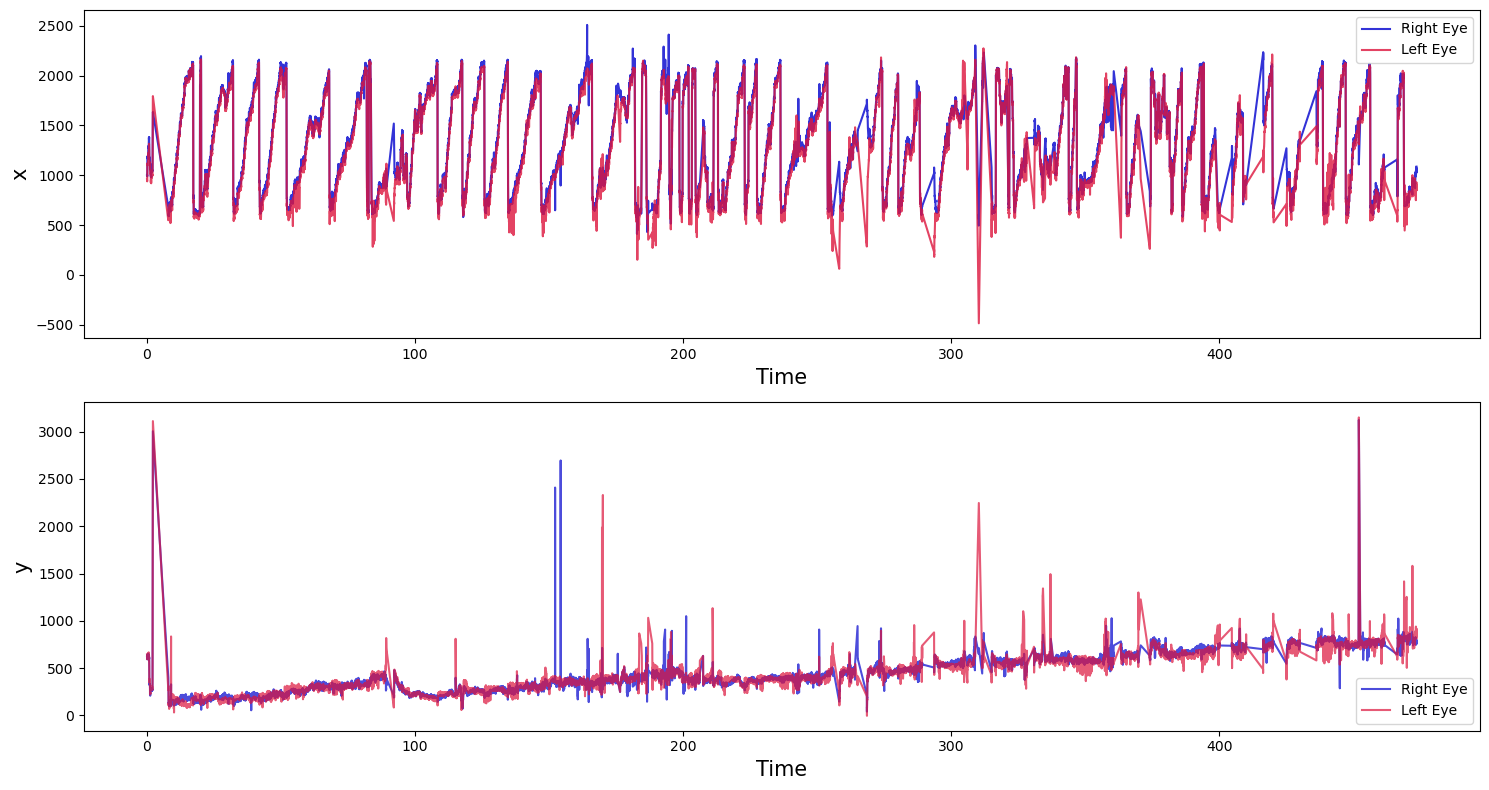

In [279]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [280]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [281]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [282]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [283]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,720.740509,685.619125,356.542482,408.660250
1,0.011853,715.696869,685.964966,350.686104,420.128303
2,0.022568,719.409561,678.830719,344.301524,415.036783
3,0.033380,712.708588,678.221359,342.100847,422.048979
4,0.044774,719.211960,689.267349,345.705307,411.134706
...,...,...,...,...,...
595,6.606899,716.830521,685.504990,467.215447,506.446767
596,6.617901,717.346039,685.533905,460.684419,514.952502
597,6.628846,715.026550,676.905289,464.303384,527.604418
598,6.639843,716.068878,681.554871,461.101727,529.889317


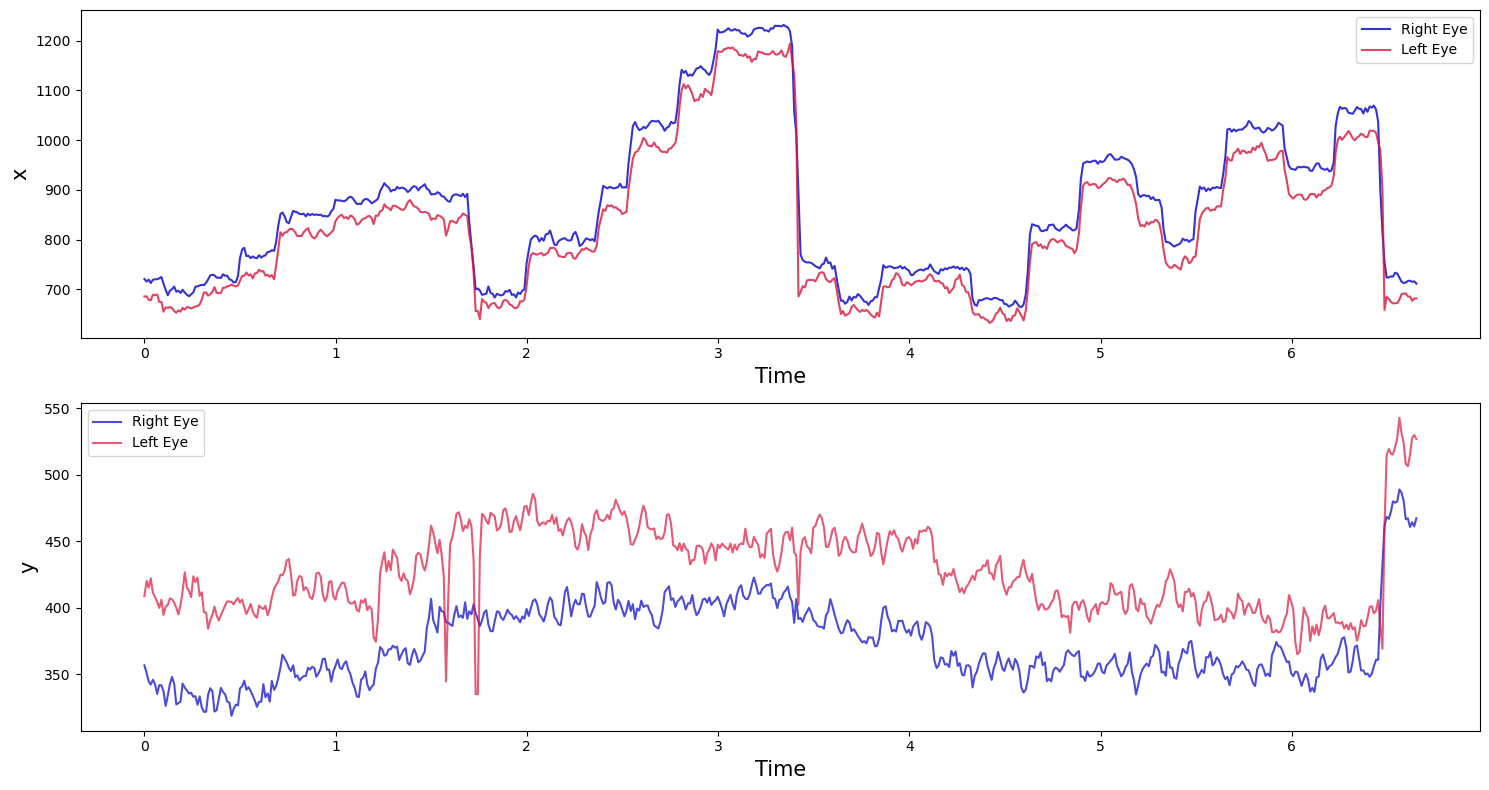

In [284]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


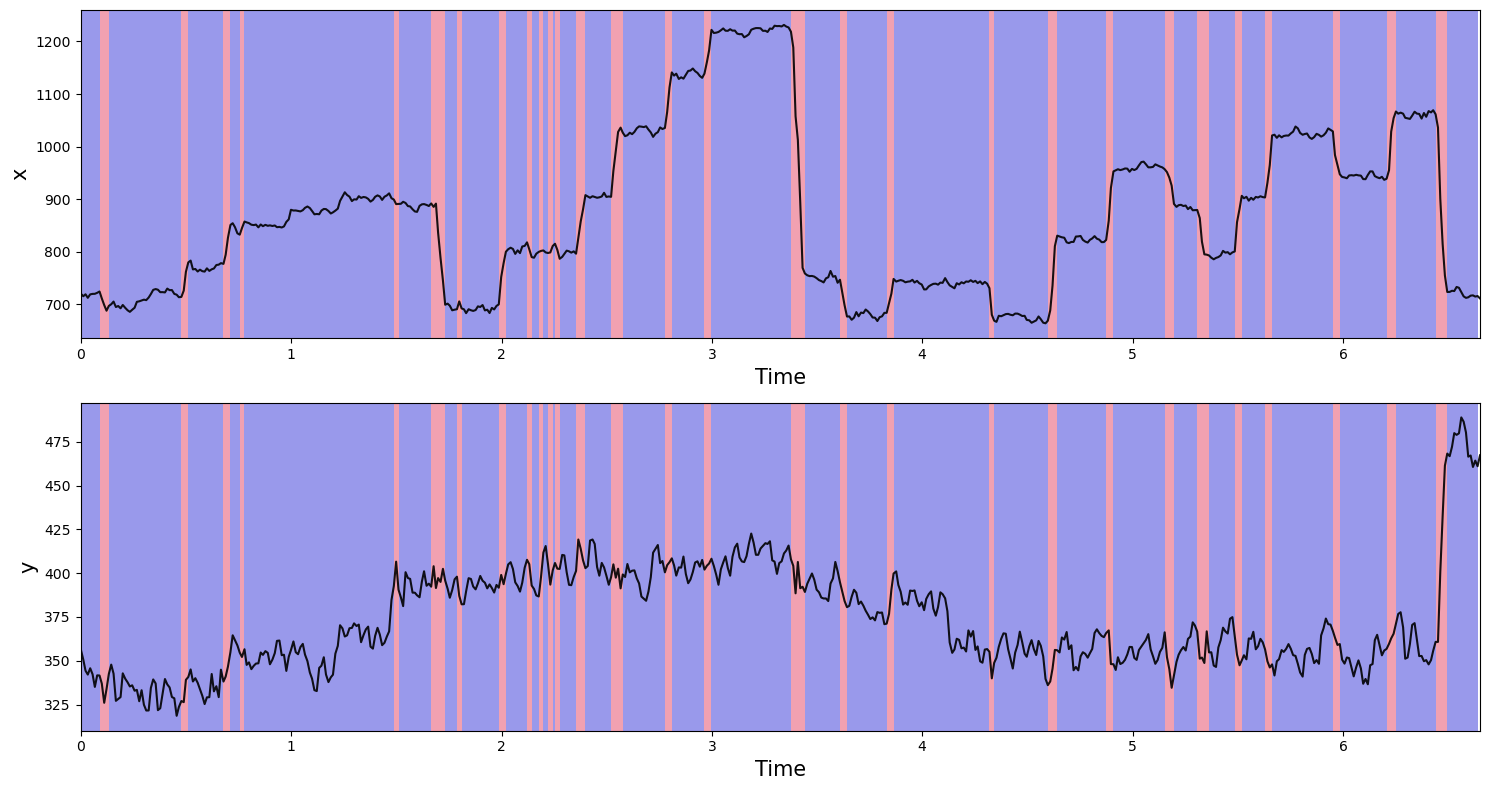

In [285]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [286]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to 

In [287]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-15.166879,30.410715,741.500427,53.162460,30.099213,739.690552,0.527264,...,2.263138,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,0
1,0.011185,1,1,-15.102528,30.422583,741.808716,53.270252,30.076078,740.025085,0.527129,...,2.262558,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,1
2,0.021415,1,1,-15.018569,30.398272,741.672791,53.355125,30.000267,739.878052,0.526973,...,2.270493,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,1
3,0.033169,1,1,-14.964145,30.374725,741.760986,53.400440,29.947439,739.948425,0.526866,...,2.275421,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,0
4,0.044682,1,1,-14.951074,30.341999,741.865295,53.423519,29.892565,740.062866,0.526837,...,2.270142,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.887504,1,1,-37.000431,25.306101,740.246155,30.616508,27.981556,740.697083,0.569194,...,2.260406,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,0
80,0.898251,1,1,-37.000431,25.306101,740.246155,30.452913,27.682928,740.617615,0.569194,...,2.239380,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,0
81,0.909682,1,1,-37.000431,25.306101,740.246155,30.135809,27.101234,740.590332,0.569194,...,2.237167,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,0
82,0.920561,1,1,-37.837452,22.717594,740.172241,29.309341,25.590464,740.598206,0.570814,...,2.338150,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Skimming,0


In [288]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [289]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-22.789991,30.862652,742.616699,45.055584,32.888927,741.678589,0.541791,...,2.401810,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1
1,0.011331,1,1,-22.777300,30.879404,742.559570,45.071556,32.896740,741.626709,0.541770,...,2.409256,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1
2,0.021352,1,1,-22.773731,30.916758,742.520081,45.076847,32.940254,741.579224,0.541765,...,2.403076,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1
3,0.032436,1,1,-22.776188,31.018076,742.468384,45.076294,33.029720,741.527283,0.541772,...,2.406509,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1
4,0.043724,1,1,-22.787449,31.112392,742.448547,45.060581,33.110355,741.511597,0.541795,...,2.403961,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,85.417135,1,1,-10.280371,30.123552,734.427002,57.332272,27.693729,732.150024,0.518098,...,2.125839,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1
7660,85.428474,1,1,-10.311770,30.125437,734.317200,57.278645,27.692268,732.007446,0.518162,...,2.120056,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1
7661,85.438590,1,1,-10.342129,30.147526,734.341675,57.258522,27.700529,732.034668,0.518220,...,2.145645,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1
7662,85.449936,1,1,-10.350128,30.158241,734.262878,57.238335,27.706425,731.969666,0.518238,...,2.150009,True,AI_HC_P04_text.txt,4.0,18.0,Arial,HC,False,Immersive,1


In [290]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [291]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [292]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")